<a href="https://colab.research.google.com/github/wendywqz/GenAI/blob/main/M3_Comparing_and_reinforcing_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this activity, I compare the performance and characteristics of two reinforcement learning algorithms:

**Q-learning** and **policy gardients**.

In [1]:
pip install numpy tensorflow matplotlib

NumPy for array and matrix operations.

TensorFlow to build the neural network for the policy gradient method.

Matplotlib for visualizing the performance of each algorithm

## **Next, overview the environment.**

In this activity, I use a simple grid environment (5 × 5) in which the agent starts at a random position and must navigate to a goal state while avoiding pitfalls. The environment includes:

States: each cell on the grid is a unique state.

Actions: the agent can move up, down, left, or right.

Rewards:

+10 for reaching the goal state (position 24).

–10 for falling into a pit (position 12).

–1 for all other movements (to encourage faster goal-reaching).

The objective is to compare how each algorithm—Q-learning and policy gradients—handles this environment and analyze their behavior.

## **Implement Q-learning**

In [14]:
# Step 1 Initialize the Q-table
import numpy as np

# Define the grid size and actions
grid_size = 5
n_actions = 4  # Actions: up, down, left, right

# Initialize the Q-table with zeros
Q_table = np.zeros((grid_size * grid_size, n_actions))

Step 2: Define the hyperparameters
Set the hyperparameters for Q-learning:
Learning rate (αα)
*   List item
*   List item
* Discount factor (γγ)
* Exploration rate (ϵϵ)

In [15]:
alpha = 0.1 # Learning rate
gamma = 0.9 # Discount factor for future rewards
epsilon = 0.1 # Exploration rate for epsilon-greedy policy

Step 3: Define the reward structure
Create a reward matrix based on the environment's feedback:
* +10 for reaching the goal
* –10 for falling into the pit
* –1 for other states

In [17]:
# Reward matrix for the grid environment
rewards = np.full((grid_size * grid_size,), -1)  # -1 for every state
rewards[24] = 10  # Goal state
rewards[12] = -10  # Pitfall state

Step 4: Implement the epsilon-greedy action selection

The agent will use an epsilon-greedy policy to balance exploration and exploitation.

In [18]:
def epsilon_greedy_action(Q_table, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, n_actions)  # Explore: random action
    else:
        return np.argmax(Q_table[state])  # Exploit: action with highest Q-value

Step 5: Update the Q-values

Use the Bellman equation to update the Q-values based on the current state, the selected action, and the reward obtained.

In [19]:
for episode in range(1000):
    state = np.random.randint(0, grid_size * grid_size)  # Start in a random state
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, grid_size * grid_size)  # Simulated next state
        reward = rewards[next_state]

        # Update Q-value using Bellman equation
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        state = next_state
        if next_state == 24 or next_state == 12:
            done = True

## **Implement policy gardients**
Step 1 Build the policy network

In [20]:
import tensorflow as tf

# Define the policy network
n_states = grid_size * grid_size  # Number of states in the grid
n_actions = 4  # Up, down, left, right

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(n_states,)),
    tf.keras.layers.Dense(n_actions, activation='softmax')  # Output action probabilities
])

# Optimizer for policy network updates
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

Step 2 Select an action

For each state, the agent selects an action based on the probabilities output by the policy network.

In [21]:
def get_action(state):
    state_input = tf.one_hot(state, n_states)  # One-hot encoding for state
    action_probs = model(state_input[np.newaxis, :])
    return np.random.choice(n_actions, p=action_probs.numpy()[0])

Step 3: Simulate the environment

Simulate the environment as the agent selects actions and collects rewards.

In [22]:
# Simulation loop
states = []
actions = []
episode_rewards = []

for episode in range(1000):
    state = np.random.randint(0, n_states)  # Start in a random state
    done = False
    while not done:
        action = get_action(state)  # Use the provided function
        next_state = np.random.randint(0, n_states)  # Simulated next state
        reward = rewards[next_state]

        # Store the state-action-reward trajectory
        states.append(state)
        actions.append(action)
        episode_rewards.append(reward)

        state = next_state
        if next_state in {24, 12}:
            done = True

Step 4: Compute cumulative rewards

To reinforce actions that lead to long-term success, calculate the cumulative rewards for each action taken during an episode.

In [23]:
def compute_cumulative_rewards(rewards, gamma=0.99):
    cumulative_rewards = np.zeros_like(rewards)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = running_add * gamma + rewards[t]
        cumulative_rewards[t] = running_add
    return cumulative_rewards

Step 5: Update the policy

Update the policy network using the REINFORCE algorithm based on the actions and cumulative rewards.

In [24]:
def update_policy(states, actions, rewards):
    cumulative_rewards = compute_cumulative_rewards(rewards)

    with tf.GradientTape() as tape:
        state_inputs = tf.one_hot(states, n_states)  # Convert states to one-hot encoding
        action_probs = model(state_inputs)
        action_masks = tf.one_hot(actions, n_actions)  # Mask for selected actions
        log_probs = tf.reduce_sum(action_masks * tf.math.log(action_probs), axis=1)

        # Policy loss is the negative log-probability of the action times the cumulative reward
        loss = -tf.reduce_mean(log_probs * cumulative_rewards)

    # Apply gradients to update the policy network
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

## **Comparison and analysis**

After implementing both Q-learning and policy gradients, it’s time to compare their performance. Here’s what to consider:

1. Convergence speed: how quickly does each algorithm learn an optimal policy?
2. Reward maximization: which algorithm achieves higher cumulative rewards?
3. Exploration vs. exploitation: how do Q-learning and policy gradients handle exploration of the environment?
4. Suitability: which algorithm is better suited for this environment, and why?

Use Matplotlib to visualize the cumulative rewards over episodes and compare how each algorithm performs.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


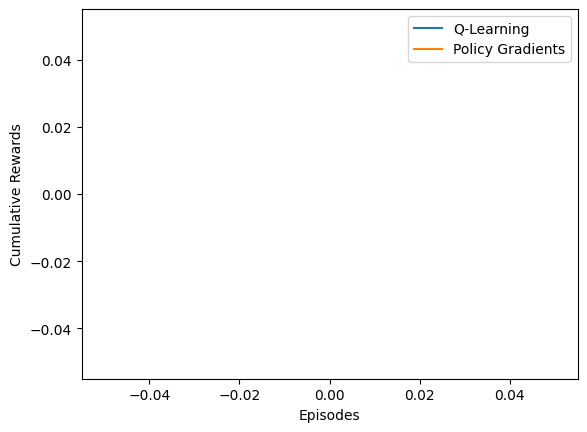

In [27]:
import matplotlib.pyplot as plt

# Initialize lists to store rewards for each episode
rewards_q_learning = []
rewards_policy_gradients = []

# ... (Your Q-learning and Policy Gradients code) ...
import numpy as np

# Define the grid size and actions
grid_size = 5
n_actions = 4  # Actions: up, down, left, right

# Initialize the Q-table with zeros
Q_table = np.zeros((grid_size * grid_size, n_actions))

alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor for future rewards
epsilon = 0.1  # Exploration rate for epsilon-greedy policy

# Reward matrix for the grid environment
rewards = np.full((grid_size * grid_size,), -1)  # -1 for every state
rewards[24] = 10  # Goal state
rewards[12] = -10  # Pitfall state

def epsilon_greedy_action(Q_table, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, n_actions)  # Explore: random action
    else:
        return np.argmax(Q_table[state])  # Exploit: action with highest Q-value

for episode in range(1000):
    state = np.random.randint(0, grid_size * grid_size)  # Start in a random state
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, grid_size * grid_size)  # Simulated next state
        reward = rewards[next_state]

        # Update Q-value using Bellman equation
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        state = next_state
        if next_state == 24 or next_state == 12:
            done = True

import tensorflow as tf

# Define the policy network
n_states = grid_size * grid_size  # Number of states in the grid
n_actions = 4  # Up, down, left, right

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(n_states,)),
    tf.keras.layers.Dense(n_actions, activation='softmax')  # Output action probabilities
])

# Optimizer for policy network updates
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

def get_action(state):
    state_input = tf.one_hot(state, n_states)  # One-hot encoding for state
    action_probs = model(state_input[np.newaxis, :])
    return np.random.choice(n_actions, p=action_probs.numpy()[0])

# Simulation loop
states = []
actions = []
episode_rewards = []

for episode in range(1000):
    state = np.random.randint(0, n_states)  # Start in a random state
    done = False
    while not done:
        action = get_action(state)  # Use the provided function
        next_state = np.random.randint(0, n_states)  # Simulated next state
        reward = rewards[next_state]

        # Store the state-action-reward trajectory
        states.append(state)
        actions.append(action)
        episode_rewards.append(reward)

        state = next_state
        if next_state in {24, 12}:
            done = True

def compute_cumulative_rewards(rewards, gamma=0.99):
    cumulative_rewards = np.zeros_like(rewards)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = running_add * gamma + rewards[t]
        cumulative_rewards[t] = running_add
    return cumulative_rewards

def update_policy(states, actions, rewards):
    cumulative_rewards = compute_cumulative_rewards(rewards)

    with tf.GradientTape() as tape:
        state_inputs = tf.one_hot(states, n_states)  # Convert states to one-hot encoding
        action_probs = model(state_inputs)
        action_masks = tf.one_hot(actions, n_actions)  # Mask for selected actions
        log_probs = tf.reduce_sum(action_masks * tf.math.log(action_probs), axis=1)

        # Policy loss is the negative log-probability of the action times the cumulative reward
        loss = -tf.reduce_mean(log_probs * cumulative_rewards)

    # Apply gradients to update the policy network
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))



# After each episode in Q-learning:
#   rewards_q_learning.append(total_reward_for_this_episode)

# After each episode in Policy Gradients:
#   rewards_policy_gradients.append(total_reward_for_this_episode)

# Example code to visualize rewards over episodes
plt.plot(rewards_q_learning, label='Q-Learning')
plt.plot(rewards_policy_gradients, label='Policy Gradients')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.legend()
plt.show()

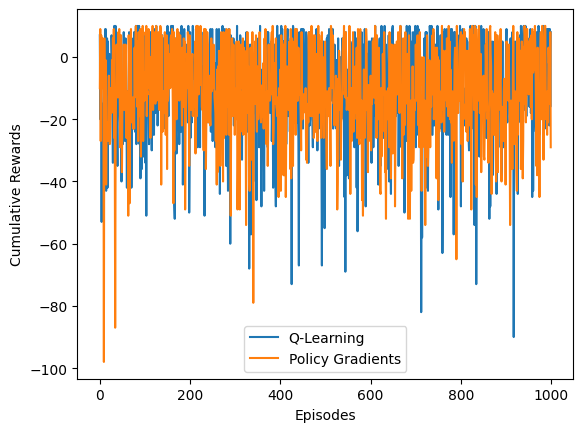

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Initialize lists to store rewards for each episode
rewards_q_learning = []
rewards_policy_gradients = []

# Define the grid size and actions
grid_size = 5
n_actions = 4  # Actions: up, down, left, right

# Initialize the Q-table with zeros
Q_table = np.zeros((grid_size * grid_size, n_actions))

alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor for future rewards
epsilon = 0.1  # Exploration rate for epsilon-greedy policy

# Reward matrix for the grid environment
rewards = np.full((grid_size * grid_size,), -1)  # -1 for every state
rewards[24] = 10  # Goal state
rewards[12] = -10  # Pitfall state

def epsilon_greedy_action(Q_table, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, n_actions)  # Explore: random action
    else:
        return np.argmax(Q_table[state])  # Exploit: action with highest Q-value

for episode in range(1000):
    state = np.random.randint(0, grid_size * grid_size)  # Start in a random state
    done = False
    total_reward_for_this_episode = 0
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, grid_size * grid_size)  # Simulated next state
        reward = rewards[next_state]
        total_reward_for_this_episode += reward

        # Update Q-value using Bellman equation
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        state = next_state
        if next_state == 24 or next_state == 12:
            done = True

    rewards_q_learning.append(total_reward_for_this_episode)

# Define the policy network
n_states = grid_size * grid_size  # Number of states in the grid
n_actions = 4  # Up, down, left, right

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(n_states,)),
    tf.keras.layers.Dense(n_actions, activation='softmax')  # Output action probabilities
])

# Optimizer for policy network updates
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

def get_action(state):
    state_input = tf.one_hot(state, n_states)  # One-hot encoding for state
    action_probs = model(state_input[np.newaxis, :])
    return np.random.choice(n_actions, p=action_probs.numpy()[0])

# Simulation loop
states = []
actions = []
episode_rewards = []

for episode in range(1000):
    state = np.random.randint(0, n_states)  # Start in a random state
    done = False
    total_reward_for_this_episode = 0
    while not done:
        action = get_action(state)  # Use the provided function
        next_state = np.random.randint(0, n_states)  # Simulated next state
        reward = rewards[next_state]
        total_reward_for_this_episode += reward

        # Store the state-action-reward trajectory
        states.append(state)
        actions.append(action)
        episode_rewards.append(reward)

        state = next_state
        if next_state in {24, 12}:
            done = True

    rewards_policy_gradients.append(total_reward_for_this_episode)

def compute_cumulative_rewards(rewards, gamma=0.99):
    cumulative_rewards = np.zeros_like(rewards)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = running_add * gamma + rewards[t]
        cumulative_rewards[t] = running_add
    return cumulative_rewards

def update_policy(states, actions, rewards):
    cumulative_rewards = compute_cumulative_rewards(rewards)

    with tf.GradientTape() as tape:
        state_inputs = tf.one_hot(states, n_states)  # Convert states to one-hot encoding
        action_probs = model(state_inputs)
        action_masks = tf.one_hot(actions, n_actions)  # Mask for selected actions
        log_probs = tf.reduce_sum(action_masks * tf.math.log(action_probs), axis=1)

        # Policy loss is the negative log-probability of the action times the cumulative reward
        loss = -tf.reduce_mean(log_probs * cumulative_rewards)

    # Apply gradients to update the policy network
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

# Example code to visualize rewards over episodes
plt.plot(rewards_q_learning, label='Q-Learning')
plt.plot(rewards_policy_gradients, label='Policy Gradients')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.legend()
plt.show()

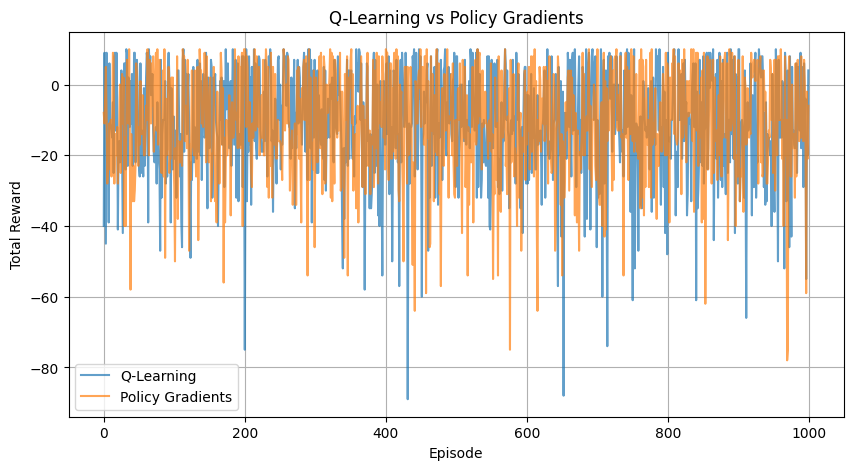

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ===================== 环境设置 =====================
grid_size = 5
n_actions = 4  # 动作：上（0）、下（1）、左（2）、右（3）
n_states = grid_size * grid_size

# 定义奖励矩阵（-1为普通状态，10为目标，-10为陷阱）
rewards = np.full((n_states,), -1)
rewards[24] = 10  # 目标状态（右下角）
rewards[12] = -10  # 陷阱状态（中间）

# ===================== Q-Learning =====================
Q_table = np.zeros((n_states, n_actions))
alpha = 0.1  # 学习率
gamma = 0.9  # 折扣因子
epsilon = 0.1  # 探索率

def epsilon_greedy_action(Q_table, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, n_actions)  # 随机探索
    else:
        return np.argmax(Q_table[state])  # 选择最优动作

rewards_q_learning = []  # 存储每回合的总奖励

for episode in range(1000):
    state = np.random.randint(0, n_states)  # 随机初始状态
    done = False
    total_reward = 0

    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)  # 模拟随机转移
        reward = rewards[next_state]
        total_reward += reward

        # Q-table 更新（Bellman方程）
        Q_table[state, action] = Q_table[state, action] + alpha * (
            reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action]
        )

        state = next_state
        if next_state in {12, 24}:  # 终止条件
            done = True

    rewards_q_learning.append(total_reward)  # 记录该回合总奖励

# ===================== Policy Gradients =====================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(n_states,)),
    tf.keras.layers.Dense(n_actions, activation='softmax')  # 输出动作概率
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

def get_action(state):
    state_input = tf.one_hot(state, n_states)
    action_probs = model(state_input[np.newaxis, :])
    return np.random.choice(n_actions, p=action_probs.numpy()[0])

rewards_policy_gradients = []  # 存储每回合的总奖励

def compute_cumulative_rewards(rewards, gamma=0.99):
    """计算折扣累积奖励"""
    cumulative_rewards = np.zeros_like(rewards, dtype=np.float32)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = running_add * gamma + rewards[t]
        cumulative_rewards[t] = running_add
    return cumulative_rewards

def update_policy(states, actions, cumulative_rewards):
    """策略梯度更新"""
    with tf.GradientTape() as tape:
        state_inputs = tf.one_hot(states, n_states)
        action_probs = model(state_inputs)
        action_masks = tf.one_hot(actions, n_actions)
        log_probs = tf.reduce_sum(action_masks * tf.math.log(action_probs), axis=1)
        loss = -tf.reduce_mean(log_probs * cumulative_rewards)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

for episode in range(1000):
    state = np.random.randint(0, n_states)
    done = False
    episode_states = []  # 存储该回合的所有状态
    episode_actions = []  # 存储该回合的所有动作
    episode_rewards = []  # 存储该回合的所有奖励

    while not done:
        action = get_action(state)
        next_state = np.random.randint(0, n_states)
        reward = rewards[next_state]

        episode_states.append(state)
        episode_actions.append(action)
        episode_rewards.append(reward)

        state = next_state
        if next_state in {12, 24}:
            done = True

    # 计算该回合的总奖励（未折扣）
    total_reward = sum(episode_rewards)
    rewards_policy_gradients.append(total_reward)

    # 计算折扣累积奖励并更新策略
    cumulative_rewards = compute_cumulative_rewards(episode_rewards, gamma=0.99)
    update_policy(episode_states, episode_actions, cumulative_rewards)

# ===================== 可视化 =====================
plt.figure(figsize=(10, 5))
plt.plot(rewards_q_learning, label="Q-Learning", alpha=0.7)
plt.plot(rewards_policy_gradients, label="Policy Gradients", alpha=0.7)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-Learning vs Policy Gradients")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import numpy as np
n = np.full(25, 4)
print(n.shape)

import numpy as np

n_states = 25
n_actions = 4

Q_table = np.zeros((n_states, n_actions))

print(Q_table.shape)  # 输出: (25, 4)

grid_size = 5
n_actions = 4  # 动作：上（0）、下（1）、左（2）、右（3）
n_states = grid_size * grid_size
Q_table = np.zeros((n_states, n_actions))
Q_table

(25,)
(25, 4)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

`Q_table = np.zeros((n_states, n_actions))`
这行代码创建了一个名为 Q_table 的 Q 表格，并将其初始化为全零。

Q_table: 变量名，表示 Q 表格。
* np.zeros(): NumPy 库中的函数，用于创建一个指定形状和数据类型的新数组，并将其所有元素初始化为零。
* (n_states, n_actions): 指定 Q 表格的形状，即 Q 表格的行数和列数。
简单来说：

这行代码创建了一个 “空白” 的 Q 表格，用于存储 Q-learning 算法中每个状态下每个行动的 Q 值。

* n_states: 表示环境中所有可能的状态的数量。
* n_actions: 表示智能体可以采取的所有可能行动的数量。

如何知道状态和行动：

状态和行动的数量取决于具体的强化学习问题。你需要根据问题的定义来确定这些值。

举例说明：

假设我们有一个简单的网格世界环境，智能体可以在其中上下左右移动。

* 状态： 网格世界中的每个网格位置都可以被视为一个状态。如果网格世界的大小是 5x5，那么总共有 25 个状态。
* 行动： 智能体可以采取的行动是上下左右移动，总共有 4 个行动。

---

它是一个 25 行 4 列的二维数组，所有元素都被初始化为 0。

25 行代表 25 个状态 (例如，在 5x5 网格世界中)。
4 列代表 4 个行动 (例如，上、下、左、右)。
每个元素 Q_table[state, action] 代表在特定状态 state 下采取特定行动 action 的 Q 值。
举例说明:

Q_table[0, 0] 代表在状态 0 下采取行动 0 的 Q 值。
Q_table[12, 3] 代表在状态 12 下采取行动 3 的 Q 值。
随着 Q-learning 算法的进行，Q 表格中的值会被不断更新，以反映智能体对环境的学习过程。 最终，Q 表格将包含每个状态下每个行动的最佳 Q 值，智能体就可以根据 Q 表格来做出最优决策。

总结：

* Q_table = np.zeros((n_states, n_actions)) 创建一个全零的 Q 表格，用于存储 Q 值。
* n_states 表示环境中所有可能的状态的数量。
* n_actions 表示智能体可以采取的所有可能行动的数量。

需要根据具体问题来确定状态和行动的数量。


---

def epsilon_greedy_action(Q_table, state, epsilon):

    if np.random.uniform(0, 1) < epsilon:

        return np.random.randint(0, n_actions)  # 随机探索

    else:

        return np.argmax(Q_table[state])  # 选择最优动作


这段代码定义了一个名为` epsilon_greedy_action` 的函数，这个函数实现了 ε-greedy 策略，用于在 Q-learning 算法中选择行动。

函数参数：

- Q_table: Q 表格，存储了每个状态下每个行动的 Q 值。
- state: 当前状态。
- epsilon: 探索率，控制探索和利用的平衡。

函数逻辑：

1. 生成随机数： np.random.uniform(0, 1) 生成一个介于 0 到 1 之间的随机数。
2. 判断是否探索： 如果生成的随机数小于 epsilon，则进行探索，即随机选择一个行动。
3. 随机选择行动： np.random.randint(0, n_actions) 生成一个介于 0 到 n_actions 之间的随机整数，表示随机选择的行动。
4. 否则进行利用： 如果生成的随机数大于等于 epsilon，则进行利用，即选择 Q 表格中当前状态下具有最高 Q 值的行动。
5. 选择最优行动： np.argmax(Q_table[state]) 返回 Q 表格中当前状态下具有最高 Q 值的行动的索引。
简单来说：

这个函数就像一个 “决策器”，它根据 ε-greedy 策略来决定智能体应该采取哪个行动。

- 如果 “运气好”（生成的随机数小于 epsilon），智能体会进行探索，随机选择一个行动，就像抛硬币决定一样。
- 如果 “运气不好”（生成的随机数大于等于 epsilon），智能体会进行利用，选择它认为可以带来最高奖励的行动，也就是 Q 表格中当前状态下具有最高 Q 值的行动。

举例说明：

假设 epsilon 等于 0.2，n_actions 等于 4，当前状态为 state。

- 如果生成的随机数小于 0.2，则函数会返回一个介于 0 到 3 之间的随机整数，表示随机选择的行动。
- 如果生成的随机数大于等于 0.2，则函数会返回 Q_table[state] 中最大值的索引，表示当前状态下具有最高 Q 值的行动。

`epsilon_greedy_action` 是一个函数，它实现了 ε-greedy 策略，用于在 Q-learning 算法中选择行动。简单来说，它帮助智能体决定下一步应该采取哪个行动。

`ε-greedy` 策略的核心思想是在 **探索 (Exploration)** 和 **利用 (Exploitation)**之间取得平衡：

- 探索 (Exploration): 尝试新的、未知的行动，以便发现可能带来更高奖励的行动。
- 利用 (Exploitation): 选择已知能够带来较高奖励的行动，以便最大化当前的收益。
- epsilon_greedy_action 函数通过一个名为 epsilon 的参数来控制探索和利用的比例。

- 当 epsilon 较大时，智能体更有可能进行探索，即随机选择一个行动。
- 当 epsilon 较小时，智能体更有可能进行利用，即选择 Q 表格中当前状态下具有最高 Q 值的行动（认为是当前最佳行动）。

**为什么 `epsilon_greedy_action` 在 episode loop 里面？**

在强化学习中，一个 episode 通常指智能体与环境互动的一个完整过程，从初始状态开始，直到达到终止状态。episode loop 就是指不断重复这个过程，让智能体通过多次尝试来学习最佳策略。

**`epsilon_greedy_action` 被放在 `episode` loop 里面的原因是：**

- 智能体需要在每个时间步都选择一个行动： 在 episode 的每个时间步，智能体都需要根据当前状态选择一个行动，才能与环境互动并获得反馈。
- ε-greedy 策略需要在 **探索 (Exploration)** 和 **利用 (Exploitation)**之间动态平衡： 在学习的早期阶段，智能体对环境的了解有限，需要更多地进行探索来发现好的行动。随着学习的进行，智能体对环境的了解逐渐增加，可以更多地进行利用，选择已知的最佳行动。因此，ε-greedy 策略需要在 episode loop 中不断地被调用，以便根据当前学习进度动态调整探索和利用的比例。
- Q 表格需要不断更新： 智能体在与环境互动过程中会获得奖励，并根据奖励来更新 Q 表格。Q 表格的更新会影响到 epsilon_greedy_action 函数的行动选择。因此，epsilon_greedy_action 需要在 episode loop 中不断地被调用，以便根据最新的 Q 表格来选择行动。

总而言之，epsilon_greedy_action 在 episode loop 中的作用是帮助智能体在每个时间步选择一个行动，并通过探索和利用的平衡来不断学习最佳策略。